# Working with Data

After you’ve identified the questions you’re trying to answer and have gotten your hands on some data, you might be tempted to dive in and immediately start building models and getting answers. But you should resist this urge. Your first step should be to explore your data.

## Exploring One-Dimensional Data

The simplest case is when you have a one-dimensional dataset, which is just a collection of numbers. For example, these could be
- the daily average number of minutes each user spends on your site
- the number of times each of a collection of data science tutorial videos was watched
- the number of pages of each of the data science books in your data science library.

An obvious first step is to compute a few summary statistics. You’d like to know how many data points you have, the smallest, the largest, the mean, and the standard deviation.

But even these don’t necessarily give you a great understanding. A good next step is to create a histogram, in which you group your data into discrete buckets and count how many points fall into each bucket:

In [1]:
from typing import List, Dict
from collections import Counter
import math

import matplotlib.pyplot as plt

def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

For example, consider the two following sets of data that we randomly generate:

In [2]:
from statistics import mean, stdev
import numpy as np

np.random.seed(0)

# uniform between -100 and 100
uniform_data = np.random.uniform(-100, 100, 10000)

# normal distribution with mean 0, standard deviation 57
normal_data = np.random.randn(10000) * 57

print(f"mean of uniform data = {mean(uniform_data)}")
print(f"stdev of uniform data = {stdev(uniform_data)}")
print(f"mean of normal data = {mean(normal_data)}")
print(f"stdev of normal data = {stdev(normal_data)}")

mean of uniform data = -0.7082216759821093
stdev of uniform data = 57.92111681621419
mean of normal data = -0.03933115004893606
stdev of normal data = 56.474738402192294


Both have means close to 0 and standard deviations close to 57. However, they have very different distributions.

Note: a statistical distribution, in simply terms, is a function that shows all the possible values (or intervals) of the data and tells you how often each value occurs.

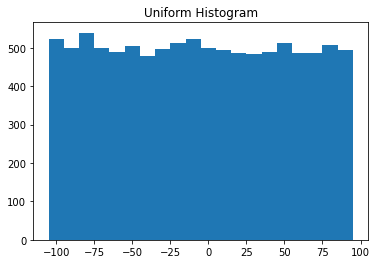

In [3]:
plot_histogram(uniform_data, 10, "Uniform Histogram")

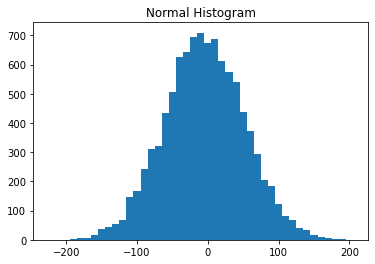

In [4]:
plot_histogram(normal_data, 10, "Normal Histogram")

In this case the two distributions have a pretty different max and min, but even knowing that wouldn’t have been sufficient to understand how they differed.

## Two Dimensions

Now imagine you have a dataset with two dimensions. Maybe in addition to daily minutes spent on the social network you have years of data science experience. Of course you’d want to understand each dimension individually. But you probably also want to scatter the data.

For example, consider another fake dataset:

In [5]:
np.random.seed(0)

xs =  np.random.randn(1000)
ys1 = xs  + np.random.randn(1000) / 2
ys2 = -xs + np.random.randn(1000) / 2

If you were to run plot_histogram on `ys1` and `ys2`, you’d get similar-looking plots (indeed, both are normally distributed with the same mean and standard deviation).

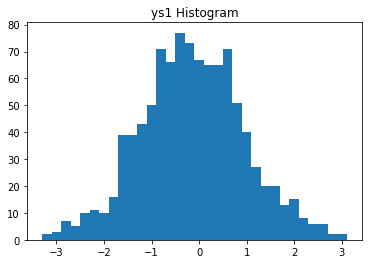

In [6]:
plot_histogram(ys1, 0.2, "ys1 Histogram")

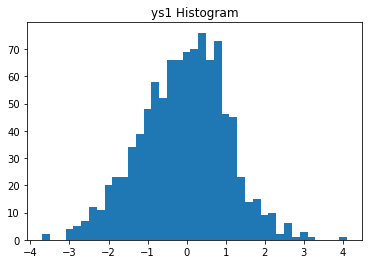

In [7]:
plot_histogram(ys2, 0.2, "ys1 Histogram")

But each has a very different joint distribution with `xs`

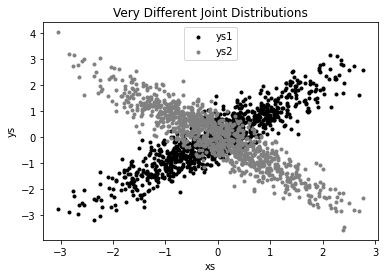

In [8]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

This difference would also be apparent if you looked at the correlations:

In [9]:
from scipy.stats import pearsonr

print(f"corr b/w x and ys1 = {pearsonr(xs, ys1)[0]}") # about 0.9
print(f"corr b/w x and ys2 = {pearsonr(xs, ys2)[0]}") # about -0.9

corr b/w x and ys1 = 0.8951815276982952
corr b/w x and ys2 = -0.9035076356308321


## Many Dimensions

With many dimensions, you’d like to know how all the dimensions relate to one another. A simple approach is to look at the *correlation matrix*, in which the entry in row *i* and column *j* is the correlation between the *i*th dimension and the *j*th dimension of the data:

In [10]:
Vector = List[float]
Matrix = List[List[float]]

def correlation_matrix(data: List[Vector]) -> Matrix:
    """
    Returns the len(data) x len(data) matrix whose (i, j)-th entry
    is the correlation between data[i] and data[j]
    """
    def correlation_ij(i: int, j: int) -> float:
        return pearsonr(data[i], data[j])[0]

    return [[correlation_ij(i, j)
             for j in range(len(data))]
             for i in range(len(data))]

In [11]:
vectors = [xs, ys1, ys2]

corr_mat = correlation_matrix(vectors)

for i in range(len(corr_mat)):
    print(corr_mat[i])

[1.0, 0.8951815276982952, -0.9035076356308321]
[0.8951815276982952, 0.9999999999999998, -0.8091538698250977]
[-0.9035076356308321, -0.8091538698250977, 1.0]


A more visual approach (if you don’t have too many dimensions) is to make a scatterplot matrix showing all the pairwise scatterplots.

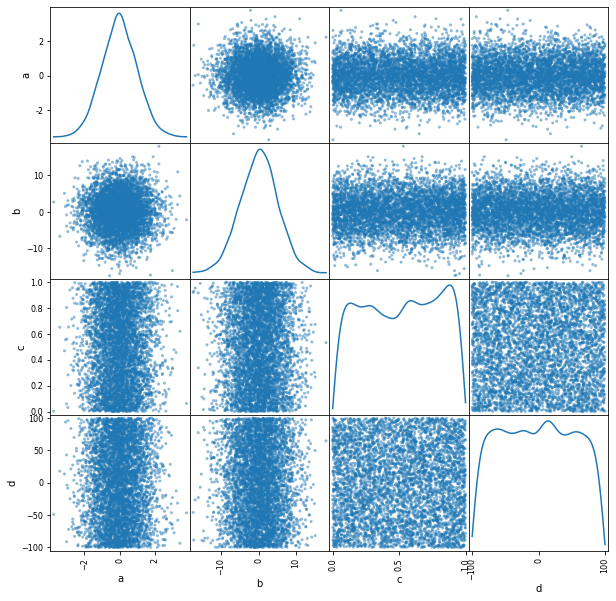

In [12]:
import pandas as pd
from pandas.plotting import scatter_matrix

# create a 1000 x 4 dataframe whose values are randomly drawn from the standard normal distribution
a = np.random.randn(5000)
b = -np.random.randn(5000) * 5
c = np.random.uniform(size = 5000)
d = np.random.uniform(-100, 100, size = 5000)

df = pd.DataFrame(data = np.column_stack((a, b, c, d)), columns=['a', 'b', 'c', 'd'])

# diagnoal can also use "hist" to show a histogram instead of doing kernel density estimation ("kde")
scatter_matrix(df, figsize=(10, 10), diagonal='kde');